In [2]:
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

In [3]:
# set the input parameters
eta_QD = 1
eta_EMF = 2
solution_conc_TIPS_Tc = 200 # mg/mL
solution_conc_QD = 100 # mg/mL
mass_quotient = solution_conc_QD/solution_conc_TIPS_Tc

solution_to_solid_ratio = 140 # convert solution mass attenutation coeff to solid state attenutation coeff

f = solution_conc_QD/(solution_conc_QD + solution_conc_TIPS_Tc)

In [4]:
# load absorption data
TIPS_Tc_data_path = 'Experimental_Data\Mass Attenutation Coeffs TIPS-Tc.csv'
TIPS_Tc_data = pandas.read_csv(TIPS_Tc_data_path)
TIPS_Tc_data['ratio']=solution_to_solid_ratio

QD_data_path = 'Experimental_Data\Mass Attenutation Coeffs PbS-TET-CA.csv'
QD_data = pandas.read_csv(QD_data_path)
QD_data['ratio']=solution_to_solid_ratio*mass_quotient

TIPS_Tc_data['Attenuation Coeff base 10 (cm-1)'] = TIPS_Tc_data['Mass Attenuation Coeff (Lg-1cm-1)']*TIPS_Tc_data['ratio']
TIPS_Tc_data['Attenuation Coeff (cm-1)'] = TIPS_Tc_data['Attenuation Coeff base 10 (cm-1)']*np.log(10)

QD_data['Attenuation Coeff base 10 (cm-1)'] = QD_data['Mass Attenuation Coeff (Lg-1cm-1)']*QD_data['ratio']
QD_data['Attenuation Coeff (cm-1)'] = QD_data['Attenuation Coeff base 10 (cm-1)']*np.log(10)


In [5]:
# set the varaiables
wl = np.array(QD_data['Wavelength (nm)'])


In [6]:
# extraction absorption ratios
mu_SF = np.array(TIPS_Tc_data['Attenuation Coeff (cm-1)'])
mu_QD = np.array(QD_data['Attenuation Coeff (cm-1)'])
alpha_SF = mu_SF/(mu_SF+mu_QD)
alpha_QD = 1 - alpha_SF

In [7]:
def Calc_eta_PM(eta_QD, alpha_QD,alpha_SF,eta_EMF):
    """ calculates the wavelength dependent eta_PM, the SF_PM PLQE
    """
    return eta_QD*(alpha_QD + alpha_SF*eta_EMF)

def Calc_eta_PM_test1():
    # no sf absorption condition
    test_alpha_QD = np.ones(100)
    test_alpha_SF = np.zeros(100)
    test_eta_QD = 1
    test_eta_EMF = 2
    assert Calc_eta_PM(test_eta_QD, test_alpha_QD,test_alpha_SF,test_eta_EMF) == np.ones(100)

def Calc_eta_PM_test1():
    # no QD absorption condition
    test_alpha_QD = np.zeros(100)
    test_alpha_SF = np.ones(100)
    test_eta_QD = 1
    test_eta_EMF = 2
    assert Calc_eta_PM(test_eta_QD, test_alpha_QD,test_alpha_SF,test_eta_EMF) == 2*np.ones(100)



In [8]:
# calculate the PLQE of the SFPM
eta_PM = Calc_eta_PM(eta_QD, alpha_QD,alpha_SF,eta_EMF)

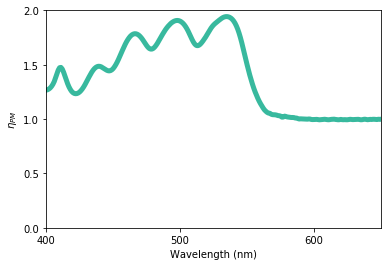

In [9]:
# plot the PLQE vs Wavelength

Blue = '#046DE0'
Yellow = '#FDBE3D'
Green = '#38B99E'
Dark_Grey = '#515151'


fig, ax = plt.subplots(1,1)
ax.plot(wl,eta_PM, color = Green,ls = "-",lw=5)

ax.set_xlim(400,650)
ax.set_ylim(0,2)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$\eta_{PM}$')
yticker = ticker.MultipleLocator(0.5)
ax.yaxis.set_major_locator(yticker)
xticker = ticker.MultipleLocator(100)
ax.xaxis.set_major_locator(xticker)